In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn. model_selection import train_test_split
from sklearn. linear_model import LogisticRegression
from sklearn. linear_model import LinearRegression
from sklearn.datasets import make_regression
from sklearn.ensemble import BaggingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import matthews_corrcoef
from sklearn.feature_selection import r_regression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import seaborn as sns
import matplotlib.pyplot as plt

In [42]:
# Генерируем датасет
df, df_1 = make_regression(n_samples=1000, n_features=10)
df = pd.DataFrame(df)
coefficients = np.random.randn(10)
coefficients[coefficients < 0] = 0

In [44]:
# Вручную задаем целевую переменную
df_1 = np.dot(df, coefficients)
df_1 += 5 * np.random.normal(size=(1000))

In [50]:
# Делим на тренировочную и тестовую выборки
X = df
y = df_1
X_train,X_test,y_train,y_test = train_test_split (X,y,test_size=0.2,random_state=0) 

In [9]:
# Строим модель с помощью бэггинга
lin_reg = LinearRegression()
reg = BaggingRegressor(estimator=lin_reg).fit(X_train, y_train)
y_pred = reg.predict(X_test)

In [10]:
# Оцениваем среднюю квадратическую ошибку MSE
mean_squared_error(y_test, y_pred)

20.602446330789004

In [11]:
# Оцениваем R^2
r2_score(y_test, y_pred)

0.3162613989399232

In [23]:
# Проверяем мультиколлинеарность признаков с помощью коэффициента корреляции
multicorr = pd.DataFrame(r_regression(X, y))\
                .reset_index()\
                .rename(columns={'index':'feature',0:"Pearson's R"})
multicorr

,feature,Pearson's R
0,0,0.135326
1,1,-0.012890
2,2,0.123167
3,3,0.262443
4,4,-0.011652
5,5,0.042683
6,6,0.413191
7,7,0.148695
8,8,0.037737
9,9,0.003294


In [24]:
# Выводим VIF для каждого признака
VIF = pd.DataFrame()
VIF['feature'] = X.columns
VIF['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
VIF

,feature,VIF
0,0,1.008959
1,1,1.012759
2,2,1.009208
3,3,1.005431
4,4,1.014675
5,5,1.012076
6,6,1.008263
7,7,1.006753
8,8,1.018805
9,9,1.006770


<Axes: title={'center': 'The title'}, xlabel='Предсказанные значения', ylabel='Остатки'>

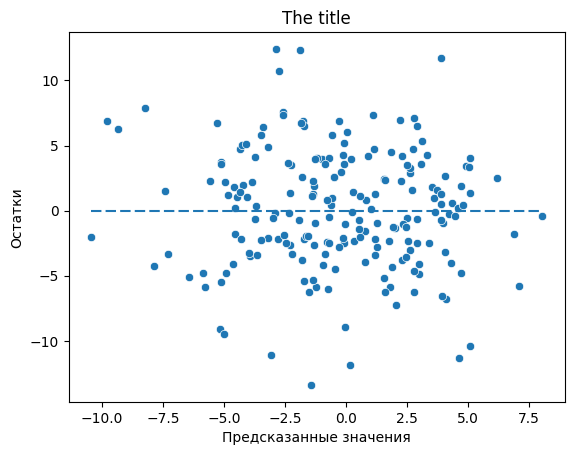

In [25]:
# Считаем остатки и строим график остатков
residual = y_test - y_pred
sns.scatterplot(x=y_pred, y=residual).set(
    xlabel="Предсказанные значения",
    ylabel="Остатки",
    title="The title")
sns.lineplot(x=y_pred, y=0, dashes=(5,2))

<Axes: ylabel='Count'>

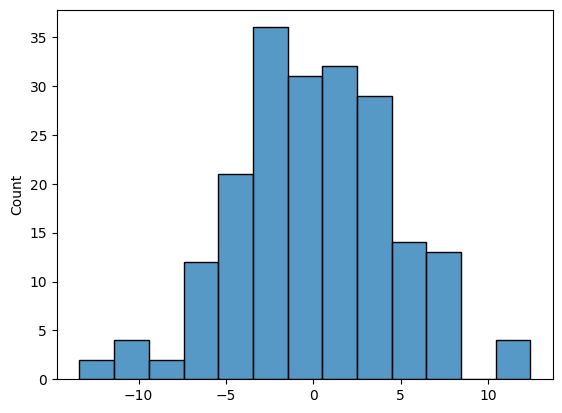

In [26]:
# Строим распределение остатков, оно близко к нормальному
sns.histplot(residual)

[[<matplotlib.axis.YTick at 0x25ba2f803d0>,

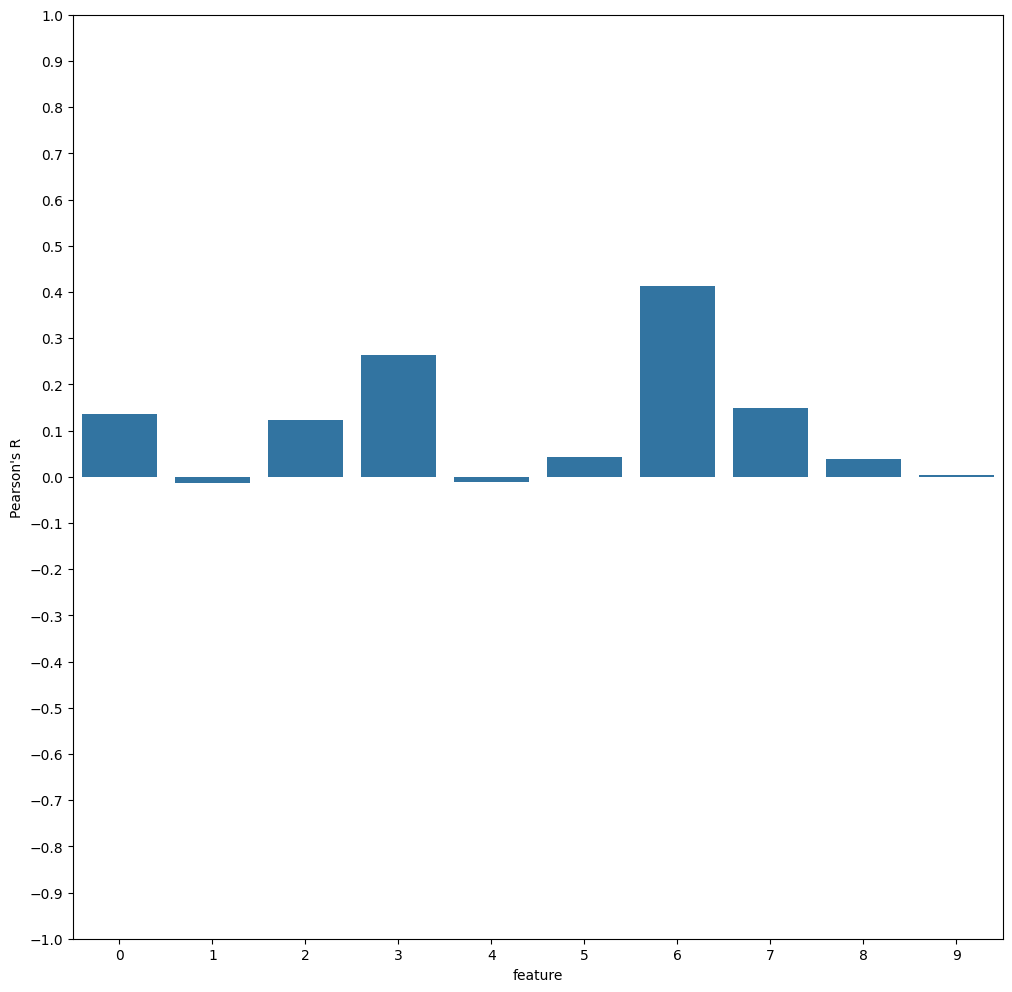

In [27]:
# Строим коэффициент корреляции
plt.figure(figsize=(12,12))
sns.barplot(x= multicorr['feature'],y=multicorr["Pearson's R"])\
    .set(yticks=[i/10 for i in range(-10,11)])

In [36]:
#Отрицательное значение соответствует обратной корреляции. Сфокусируемся на модуле
#По шкале Чеддока все значения в пределах 0.1-0.3 соответствуют слабой корелляции, а для признаков
#у которых меньше 0.1, практически отсутствует